# Exploratory Data Analysis

## 0. Import Packages

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

## 1. Seismic Data

* Training data: seismic waveform recordings (model input) and their corresponding velocity maps (ground truth)
* 3 dataset families: Vel, Fault, Style
* Each file contains 500 samples
* Data from [OpenFWI](https://smileunc.github.io/projects/openfwi/datasets)

### Load the data

In [2]:
train_path = '/kaggle/input/waveform-inversion/train_samples/'

#### Vel

In [3]:
# FlatVel_A
s1 = np.load(train_path + 'FlatVel_A/data/data1.npy')
s2 = np.load(train_path + 'FlatVel_A/data/data2.npy')

# FlatVel_B
s3 = np.load(train_path + 'FlatVel_B/data/data1.npy')
s4 = np.load(train_path + 'FlatVel_B/data/data2.npy')

# CurveVel_A
s5 = np.load(train_path + 'CurveVel_A/data/data1.npy')
s6 = np.load(train_path + 'CurveVel_A/data/data2.npy')

# CurveVel_B
s7 = np.load(train_path + 'CurveVel_B/data/data1.npy')
s8 = np.load(train_path + 'CurveVel_B/data/data2.npy')

#### Style

In [4]:
# Style_A
s9 = np.load(train_path + 'Style_A/data/data1.npy')
s10 = np.load(train_path + 'Style_A/data/data2.npy')

# Style_B
s11 = np.load(train_path + 'Style_B/data/data1.npy')
s12 = np.load(train_path + 'Style_B/data/data2.npy')

#### Fault

In [5]:
# FlatFault_A
s13 = np.load(train_path + 'FlatFault_A/seis2_1_0.npy')
s14 = np.load(train_path + 'FlatFault_A/seis4_1_0.npy')

# FlatFault_B
s15 = np.load(train_path + 'FlatFault_B/seis6_1_0.npy')
s16 = np.load(train_path + 'FlatFault_B/seis8_1_0.npy')

# CurveFault_A
s17 = np.load(train_path + 'CurveFault_A/seis2_1_0.npy')
s18 = np.load(train_path + 'CurveFault_A/seis4_1_0.npy')

# CurveFault_B
s19 = np.load(train_path + 'CurveFault_B/seis6_1_0.npy')
s20 = np.load(train_path + 'CurveFault_B/seis8_1_0.npy')

### Shape of each seismic dataset

In [6]:
print('Seismic Datasets Shapes')

# Vel
print('Vel')
vel = [s1, s2, s3, s4, s5, s6, s7, s8]
for v in vel:
    print(v.shape)
print()

# Style
print('Style')
style = [s9, s10, s11, s12]
for s in style:
    print(s.shape)
print()

# Fault
print('Fault')
fault = [s13, s14, s15, s16, s17, s18, s19, s20]
for f in fault:
    print(f.shape)

Seismic Datasets Shapes
Vel
(500, 5, 1000, 70)
(500, 5, 1000, 70)
(500, 5, 1000, 70)
(500, 5, 1000, 70)
(500, 5, 1000, 70)
(500, 5, 1000, 70)
(500, 5, 1000, 70)
(500, 5, 1000, 70)

Style
(500, 5, 1000, 70)
(500, 5, 1000, 70)
(500, 5, 1000, 70)
(500, 5, 1000, 70)

Fault
(500, 5, 1000, 70)
(500, 5, 1000, 70)
(500, 5, 1000, 70)
(500, 5, 1000, 70)
(500, 5, 1000, 70)
(500, 5, 1000, 70)
(500, 5, 1000, 70)
(500, 5, 1000, 70)


* Seismic data: recorded waveforms from receivers
* Each sample is a 4D array of shape (batch_size, num_sources, time_steps, num_receivers), representing wave recordings over time

In [7]:
s1.shape

(500, 5, 1000, 70)

Each dataset contains:
* 500 samples
* 5 sources
* 1000 time steps
* 70 receivers

### Check for missing data

In [8]:
seismic_data = vel + style + fault
c = 0
for i, dataset in enumerate(seismic_data):
    if np.isnan(dataset).sum() != 0:
        print(f'{np.isnan(dataset).sum()} missing value(s) in dataset s{i+1}.')
        c += 1
if c == 0:
    print('No missing data')

No missing data


### Visualize a sample from each family

#### Seismic waveforms recorded by all sources and receivers

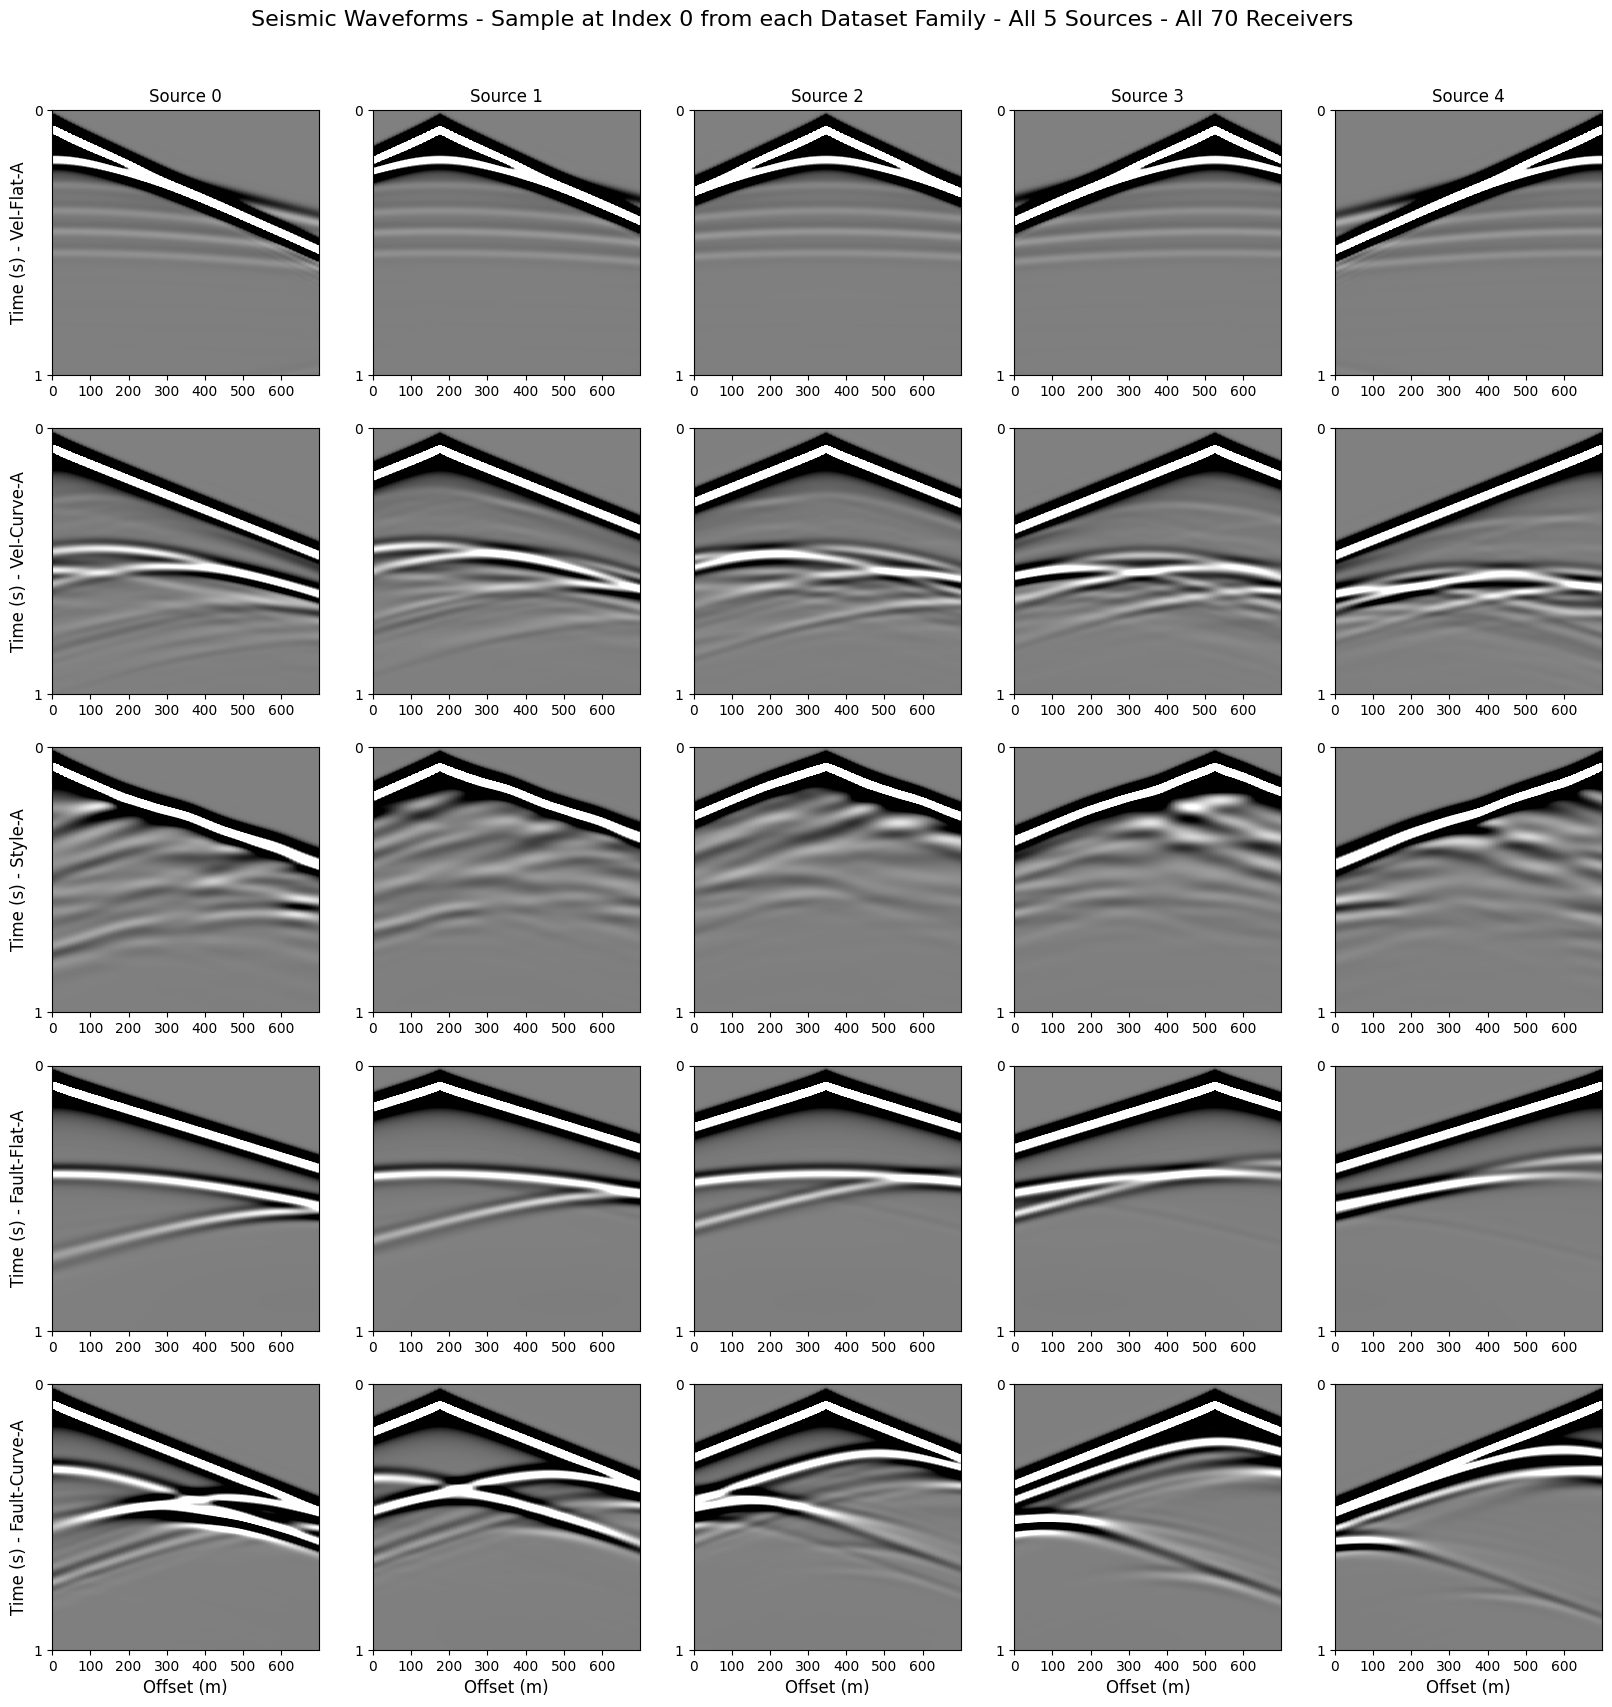

In [9]:
fig, ax = plt.subplots(5, 5, figsize = (20, 20))
colormap = 'gray'
#colormap = 'seismic'
sample = 0

# Loop over each source
for i in range(5):
    # Vel-Flat-A
    ax[0, i].imshow(s1[sample,i,:,:], extent=[0,70,1000,0], aspect='auto', cmap=colormap, vmin=-0.5, vmax=0.5)

    # Vel-Curve-A
    ax[1, i].imshow(s5[sample,i,:,:], extent=[0,70,1000,0], aspect='auto', cmap=colormap, vmin=-0.5, vmax=0.5)
    
    # Style-A
    ax[2, i].imshow(s9[sample,i,:,:], extent=[0,70,1000,0], aspect='auto', cmap=colormap, vmin=-0.5, vmax=0.5)
    
    # Fault-Flat-A
    ax[3, i].imshow(s13[sample,i,:,:], extent=[0,70,1000,0], aspect='auto', cmap=colormap, vmin=-0.5, vmax=0.5)
    
    # Fault-Curve-A
    ax[4, i].imshow(s17[sample,i,:,:], extent=[0,70,1000,0], aspect='auto', cmap=colormap, vmin=-0.5, vmax=0.5)

    ax[4, i].set_xlabel('Offset (m)', fontsize=12)
    ax[0, i].set_title('Source ' + str(i))

    for j in range(5):
       ax[i, j].set_xticks(range(0, 70, 10))
       ax[i, j].set_xticklabels(range(0, 700, 100))
       ax[i, j].set_yticks(range(0, 2000, 1000))
       ax[i, j].set_yticklabels(range(0, 2,1))

ax[0, 0].set_ylabel('Time (s) - Vel-Flat-A', fontsize=12)
ax[1, 0].set_ylabel('Time (s) - Vel-Curve-A', fontsize=12)
ax[2, 0].set_ylabel('Time (s) - Style-A', fontsize=12)
ax[3, 0].set_ylabel('Time (s) - Fault-Flat-A', fontsize=12)
ax[4, 0].set_ylabel('Time (s) - Fault-Curve-A', fontsize=12)

fig.suptitle('Seismic Waveforms - Sample at Index 0 from each Dataset Family - All 5 Sources - All 70 Receivers', 
             fontsize=16,
             y=0.93)

plt.show()

#### Isolate measurements to one source and five receivers

In [10]:
time = np.arange(1000)
intervals = np.round(np.linspace(0, 69, 5)).astype(int)
print(intervals)

[ 0 17 34 52 69]


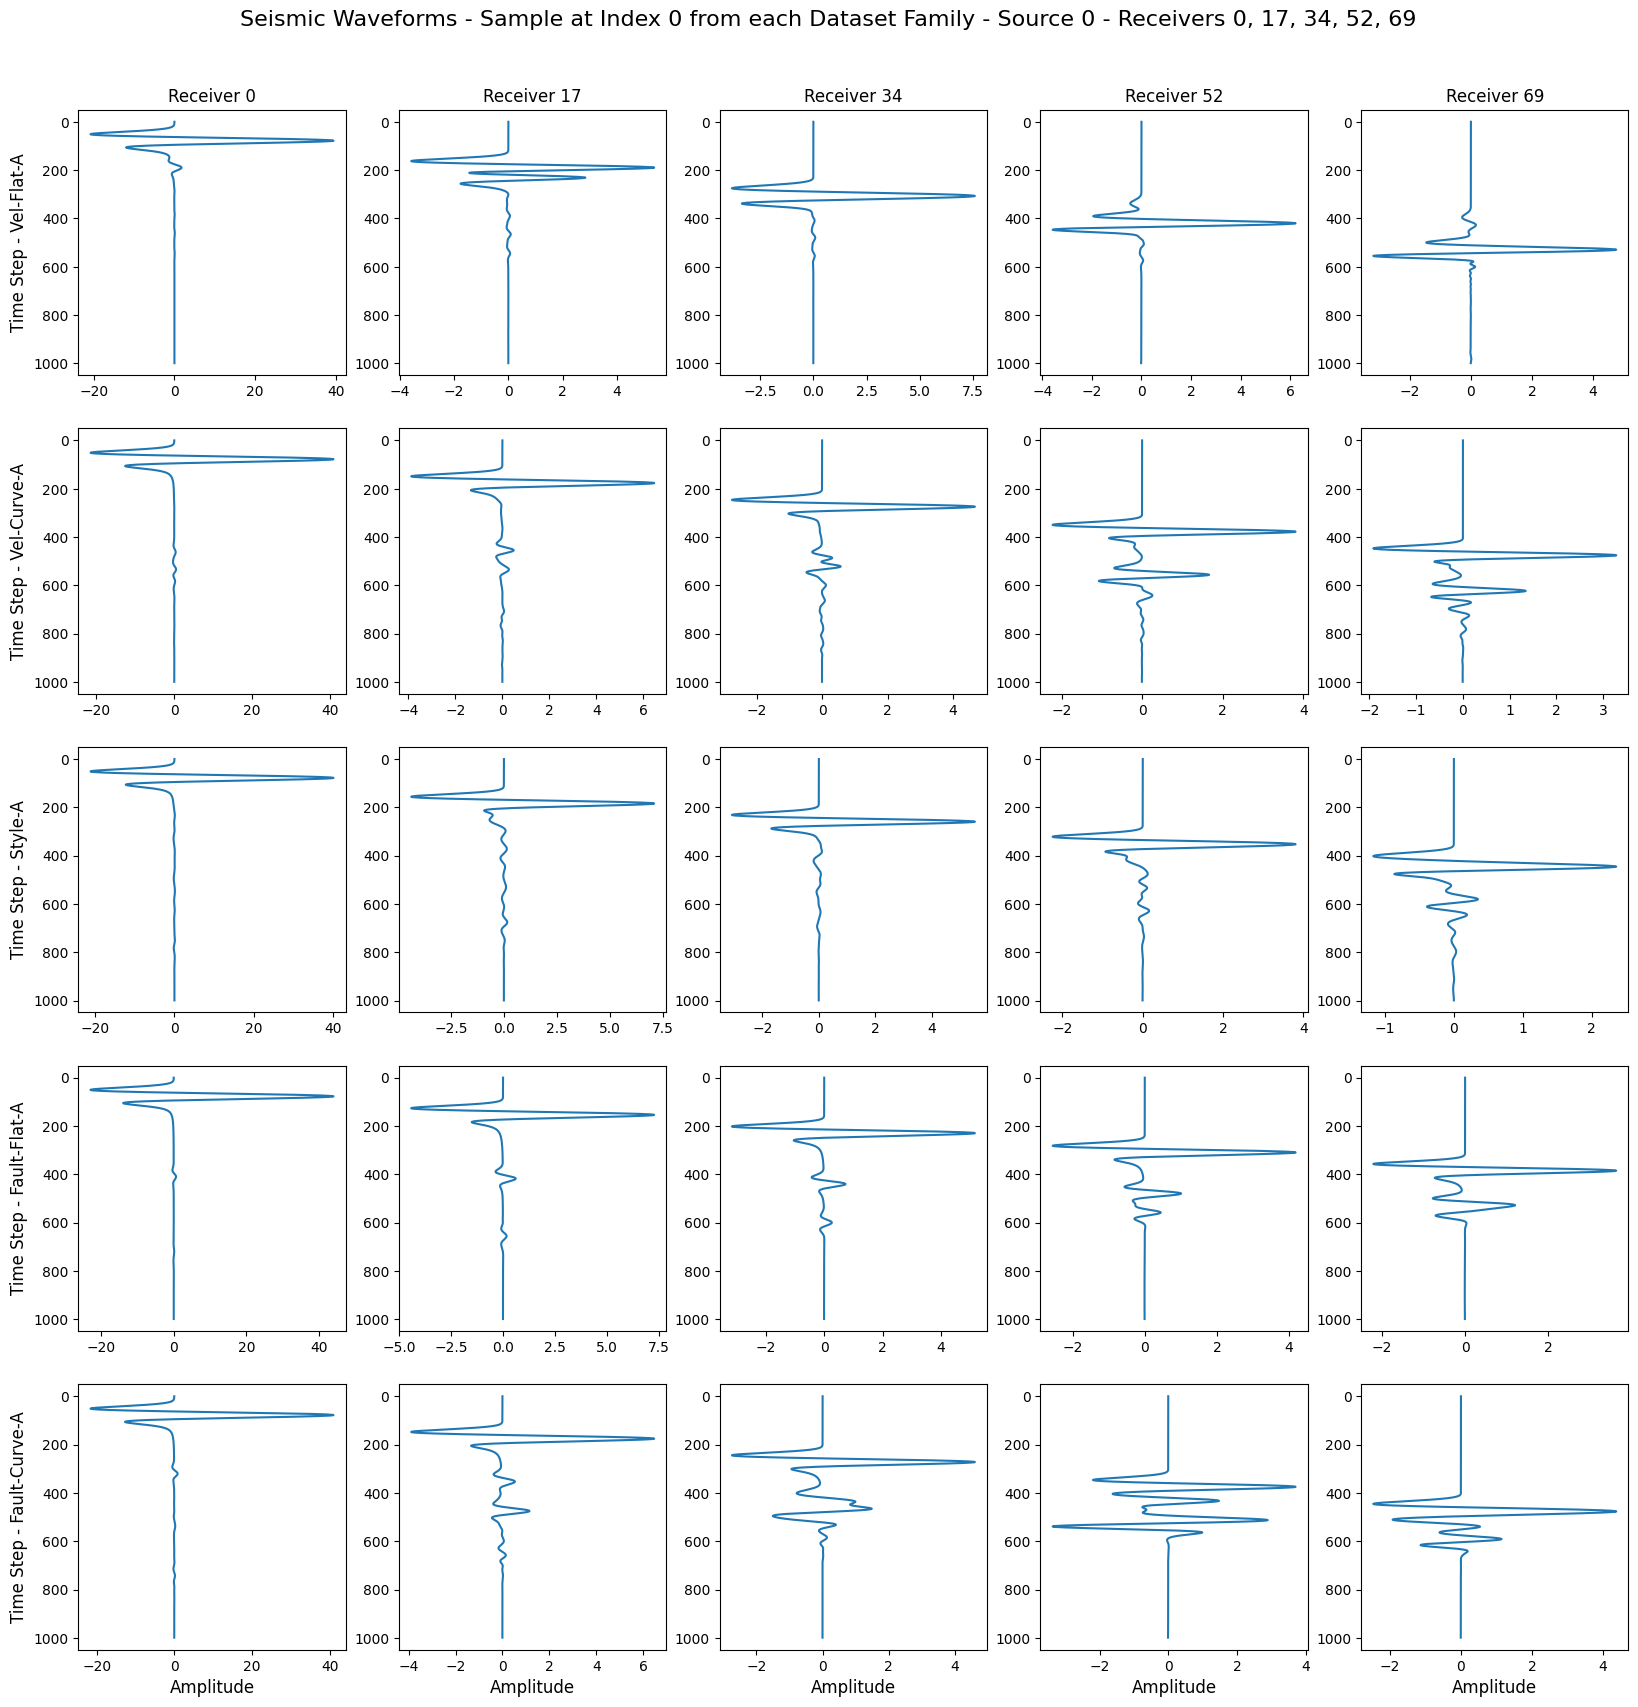

In [11]:
fig, ax = plt.subplots(5, 5, figsize = (20, 20))
sample = 0

# Loop over 5 receivers
for i in range(5):
    # Vel-Flat-A
    ax[0, i].plot(s1[sample,0,:,intervals[i]], time)
    
    # Vel-Curve-A
    ax[1, i].plot(s5[sample,0,:,intervals[i]], time)
    
    # Style-A
    ax[2, i].plot(s9[sample,0,:,intervals[i]], time)
    
    # Fault-Flat-A
    ax[3, i].plot(s13[sample,0,:,intervals[i]], time)
    
    # Fault-Curve-A
    ax[4, i].plot(s17[sample,0,:,intervals[i]], time)

    ax[0, i].set_title('Receiver ' + str(intervals[i]))
    ax[4, i].set_xlabel('Amplitude', fontsize=12)
    
for axis in ax.flat:
    axis.invert_yaxis()

ax[0, 0].set_ylabel('Time Step - Vel-Flat-A', fontsize=12)
ax[1, 0].set_ylabel('Time Step - Vel-Curve-A', fontsize=12)
ax[2, 0].set_ylabel('Time Step - Style-A', fontsize=12)
ax[3, 0].set_ylabel('Time Step - Fault-Flat-A', fontsize=12)
ax[4, 0].set_ylabel('Time Step - Fault-Curve-A', fontsize=12)

fig.suptitle('Seismic Waveforms - Sample at Index 0 from each Dataset Family - Source 0 - Receivers 0, 17, 34, 52, 69', 
             fontsize=16,
             y=0.93)

plt.show()

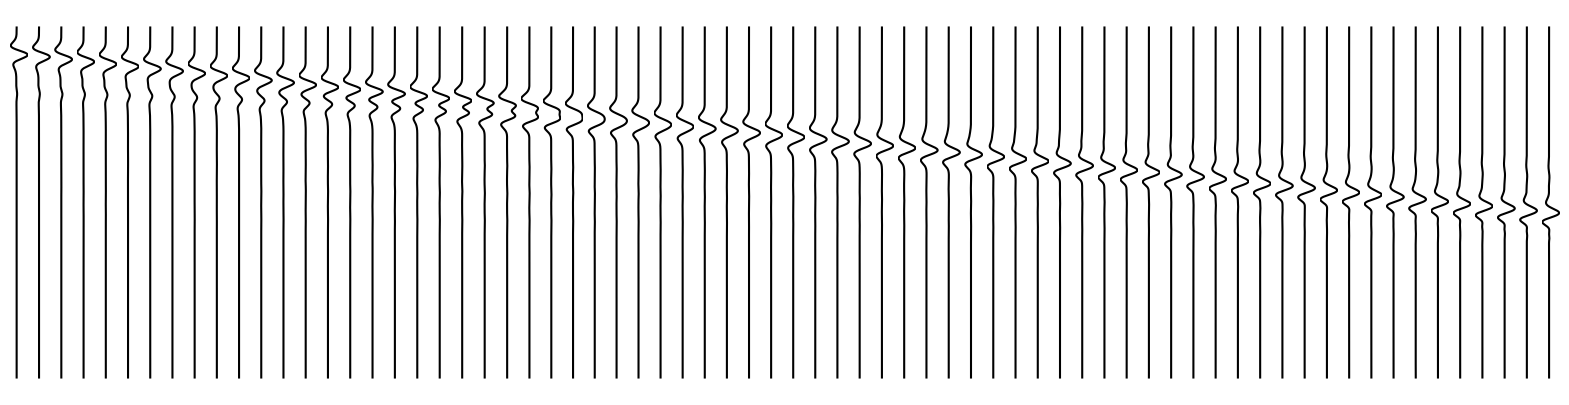

In [12]:
# Visualize Vel-Flat-A
fig, ax = plt.subplots(1, 70, figsize = (20, 5))

for i in range(70):
    ax[i].plot(s1[sample,0,:,i], time, color='black')

fig.patch.set_visible(False)

for axis in ax.flat:
    axis.invert_yaxis()
    axis.axis('off')

plt.show()

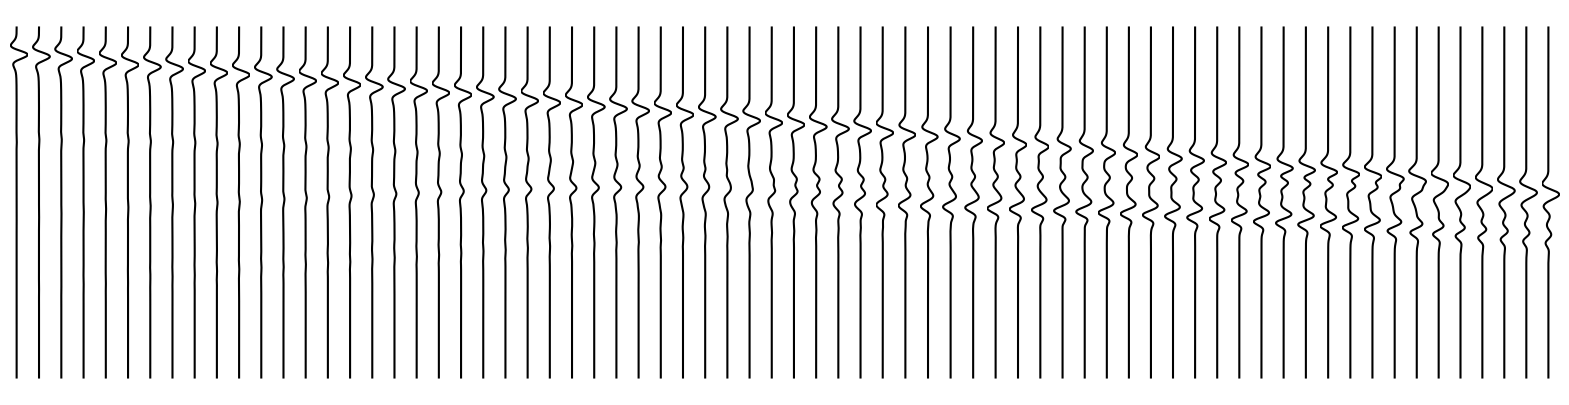

In [13]:
# Visualize Vel-Curve-A
fig, ax = plt.subplots(1, 70, figsize = (20, 5))

for i in range(70):
    ax[i].plot(s17[sample,0,:,i], time, color='black')

fig.patch.set_visible(False)

for axis in ax.flat:
    axis.invert_yaxis()
    axis.axis('off')

plt.show()

### Summary statistics

In [14]:
# Calculate summary statistics for each seismic dataset (20 total)
idx = []
means_list = []
medians_list = []
max_list = []
min_list = []
std_list = []
zero_crossings_list = []

for i, data in enumerate(seismic_data):
    idx.append(i)
    
    m = np.mean(data)
    means_list.append(m)
    
    medians_list.append(np.median(data))
    max_list.append(np.max(data))
    min_list.append(np.min(data))
    
    sd = np.std(data)
    std_list.append(sd)
    
    sign_changes = np.diff(np.sign(data))
    zero_crossings = np.where((sign_changes != 0))[0]
    zero_crossings_list.append(len(zero_crossings))

In [15]:
dataset_names = ['FlatVel_A1', 'FlatVel_A2', 'FlatVel_B1', 'FlatVel_B2', 'CurveVel_A1', 'CurveVel_A2', 'CurveVel_B1', 'CurveVel_B2', 
                 'Style_A1', 'Style_A2', 'Style_B1', 'Style_B2', 'FlatFault_A1', 'FlatFault_A2', 'FlatFault_B1', 'FlatFault_B2', 
                 'CurveFault_A1', 'CurveFault_A2', 'CurveFault_B1', 'CurveFault_B2']

d = {
    'dataset-name': dataset_names,
    'mean': means_list, 
    'standard-deviation': std_list,
    'median': medians_list,
    'maximum': max_list,
    'minimum': min_list,
    'zero-crossings-count': zero_crossings_list
}

df_seismic = pd.DataFrame(data=d, index=idx)
df_seismic['range'] = df_seismic['maximum'] - df_seismic['minimum']
df_seismic['signal-to-noise-ratio'] = df_seismic['mean'] / df_seismic['standard-deviation']
df_seismic['dataset-family'] = df_seismic['dataset-name'].apply(lambda x: 'Vel' if 'Vel' in x else 'Fault' if 'Fault' in x else 'Style')
df_seismic

,dataset-name,mean,standard-deviation,median,maximum,minimum,zero-crossings-count,range,signal-to-noise-ratio,dataset-family
0,FlatVel_A1,-0.000001,1.472613,-0.004366,49.974670,-25.700329,12795196,75.675003,-9.225217e-07,Vel
1,FlatVel_A2,-0.000062,1.483476,-0.004565,50.357651,-25.878492,12637661,76.236145,-4.206160e-05,Vel
2,FlatVel_B1,-0.000257,1.778890,-0.003529,55.305473,-27.163937,9856386,82.469406,-1.442206e-04,Vel
3,FlatVel_B2,-0.000309,1.779694,-0.003563,55.108021,-27.153419,9996458,82.261444,-1.734093e-04,Vel
4,CurveVel_A1,-0.000052,1.491781,-0.004306,52.181770,-26.430405,17976382,78.612175,-3.498455e-05,Vel
5,CurveVel_A2,-0.000059,1.485475,-0.004126,52.675026,-26.385921,18505793,79.060944,-3.973832e-05,Vel
6,CurveVel_B1,-0.000253,1.773636,-0.003488,55.775482,-27.159523,13959473,82.935005,-1.424956e-04,Vel
7,CurveVel_B2,-0.000219,1.763400,-0.003175,55.439606,-27.158047,14405997,82.597656,-1.242797e-04,Vel
8,Style_A1,0.000262,1.460292,-0.002503,47.598297,-24.407917,16904357,72.006210,1.796413e-04,Style
9,Style_A2,0.000257,1.461869,-0.002537,48.273872,-24.514183,16660491,72.788055,1.760285e-04,Style


#### Grouped by dataset family

In [16]:
numeric_list = df_seismic.select_dtypes(include='number').columns.tolist()
df_seismic_grouped = df_seismic.groupby('dataset-family')[numeric_list].mean().round(2)
df_seismic_grouped

,mean,standard-deviation,median,maximum,minimum,zero-crossings-count,range,signal-to-noise-ratio
dataset-family,,,,,,,,
Fault,-0.0,1.52,-0.0,49.570000,-25.070000,16437706.75,74.639999,-0.0
Style,0.0,1.46,-0.0,46.330002,-23.799999,17896829.00,70.129997,0.0
Vel,-0.0,1.63,-0.0,53.349998,-26.629999,13766668.25,79.980003,-0.0


### Histograms of seismic data

#### Five sample waveform recordings

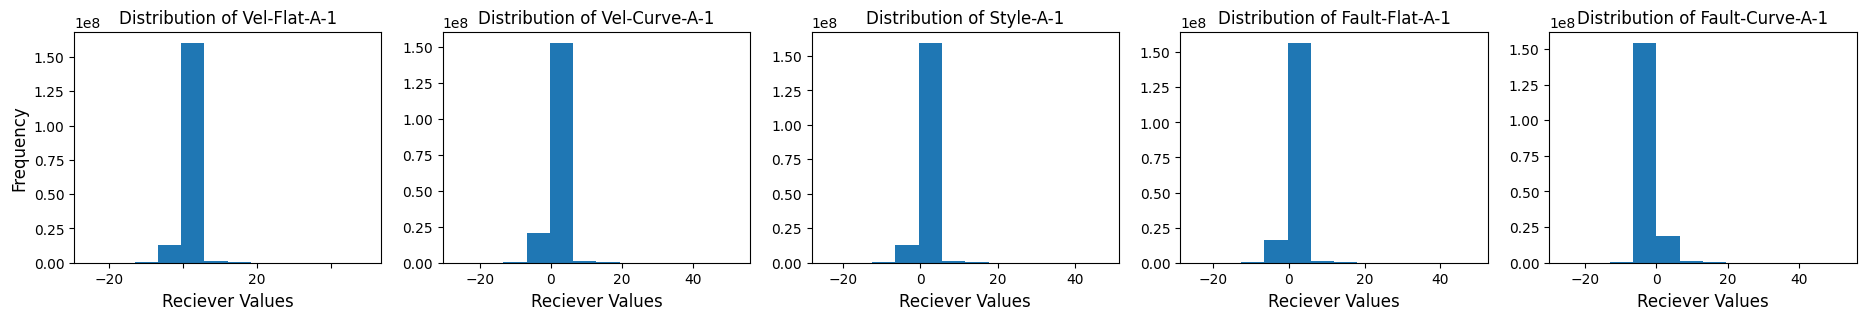

In [17]:
fig, ax = plt.subplots(1, 5, figsize = (23, 3))

ax[0].hist(s1.flatten(), bins=12)
ax[1].hist(s5.flatten(), bins=12)
ax[2].hist(s9.flatten(), bins=12)
ax[3].hist(s13.flatten(), bins=12)
ax[4].hist(s17.flatten(), bins=12)

ax[0].set_title('Distribution of Vel-Flat-A-1', fontsize=12)
ax[1].set_title('Distribution of Vel-Curve-A-1', fontsize=12)
ax[2].set_title('Distribution of Style-A-1', fontsize=12)
ax[3].set_title('Distribution of Fault-Flat-A-1', fontsize=12)
ax[4].set_title('Distribution of Fault-Curve-A-1', fontsize=12)

for i in range(5):
    ax[i].set_xlabel('Reciever Values', fontsize=12)

ax[0].set_ylabel('Frequency', fontsize=12)

# Set the x-axis ticks to show only every other tick for the first plot
for i, label in enumerate(ax[0].xaxis.get_ticklabels()):
    if i % 2 == 0:
        label.set_visible(False)

plt.show()

#### Summary statistics

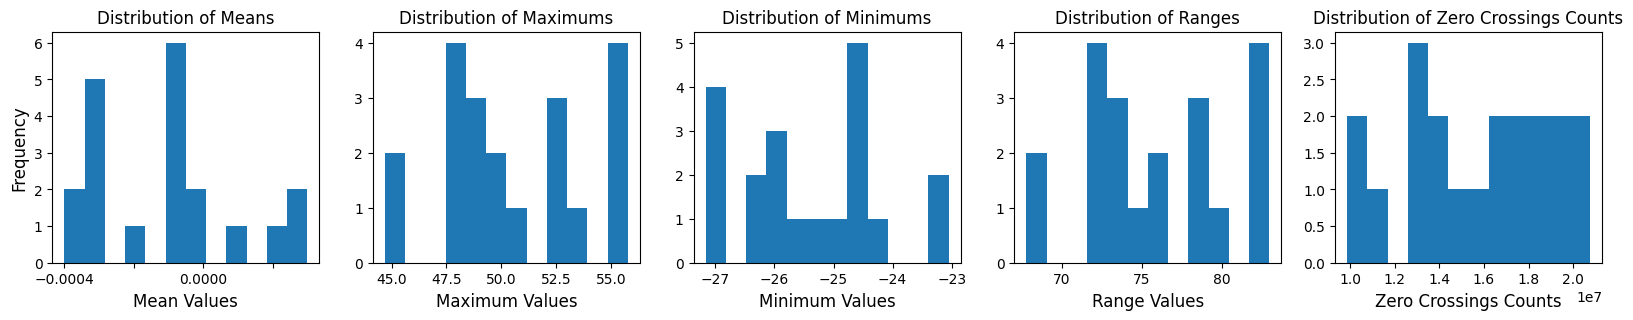

In [18]:
fig, ax = plt.subplots(1, 5, figsize = (20, 3))

ax[0].hist(np.round(means_list, 4), bins=12)
ax[1].hist(np.round(max_list, 4), bins=12)
ax[2].hist(np.round(min_list, 4), bins=12)
ax[3].hist(df_seismic['range'].tolist(), bins=12)
ax[4].hist(df_seismic['zero-crossings-count'].tolist(), bins=12)

ax[0].set_title('Distribution of Means')
ax[1].set_title('Distribution of Maximums')
ax[2].set_title('Distribution of Minimums')
ax[3].set_title('Distribution of Ranges')
ax[4].set_title('Distribution of Zero Crossings Counts')

ax[0].set_xlabel('Mean Values', fontsize=12)
ax[1].set_xlabel('Maximum Values', fontsize=12)
ax[2].set_xlabel('Minimum Values', fontsize=12)
ax[3].set_xlabel('Range Values', fontsize=12)
ax[4].set_xlabel('Zero Crossings Counts', fontsize=12)

# Set the x-axis ticks to show only every other tick for the first plot
for i, label in enumerate(ax[0].xaxis.get_ticklabels()):
    if i % 2 == 0:
        label.set_visible(False)

ax[0].set_ylabel('Frequency', fontsize=12)

plt.show()

### Cumulative Distribution Function (CDF) of seismic data

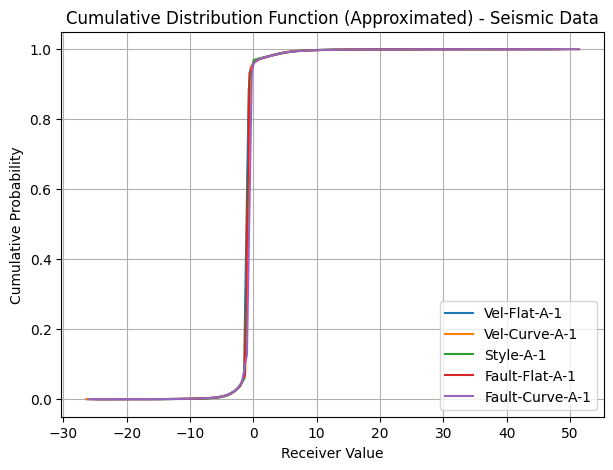

In [19]:
bins = 100
fig, ax = plt.subplots(1, 1, figsize = (7,5)) 

# Vel-Flat-A-1
data = s1.flatten()
hist, bin_edges = np.histogram(data, bins=bins, density=True)
cdf = np.cumsum(hist) * (bin_edges[1] - bin_edges[0])  
plt.plot(bin_edges[:-1], cdf, label='Vel-Flat-A-1')

# Vel-Curve-A-1
data = s5.flatten()
hist, bin_edges = np.histogram(data, bins=bins, density=True)
cdf = np.cumsum(hist) * (bin_edges[1] - bin_edges[0])  
plt.plot(bin_edges[:-1], cdf, label='Vel-Curve-A-1')

# Style-A-1
data = s9.flatten()
hist, bin_edges = np.histogram(data, bins=bins, density=True)
cdf = np.cumsum(hist) * (bin_edges[1] - bin_edges[0])  
plt.plot(bin_edges[:-1], cdf, label='Style-A-1')

# Fault-Flat-A-1
data = s13.flatten()
hist, bin_edges = np.histogram(data, bins=bins, density=True)
cdf = np.cumsum(hist) * (bin_edges[1] - bin_edges[0])  
plt.plot(bin_edges[:-1], cdf, label='Fault-Flat-A-1')

# Fault-Curve-A-1
data = s17.flatten()
hist, bin_edges = np.histogram(data, bins=bins, density=True)
cdf = np.cumsum(hist) * (bin_edges[1] - bin_edges[0])  
plt.plot(bin_edges[:-1], cdf, label='Fault-Curve-A-1')

plt.title('Cumulative Distribution Function (Approximated) - Seismic Data')
plt.xlabel('Receiver Value')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.legend(loc='lower right')

plt.show()

### Discrete Fourier Transform (DFT) of seismic waves

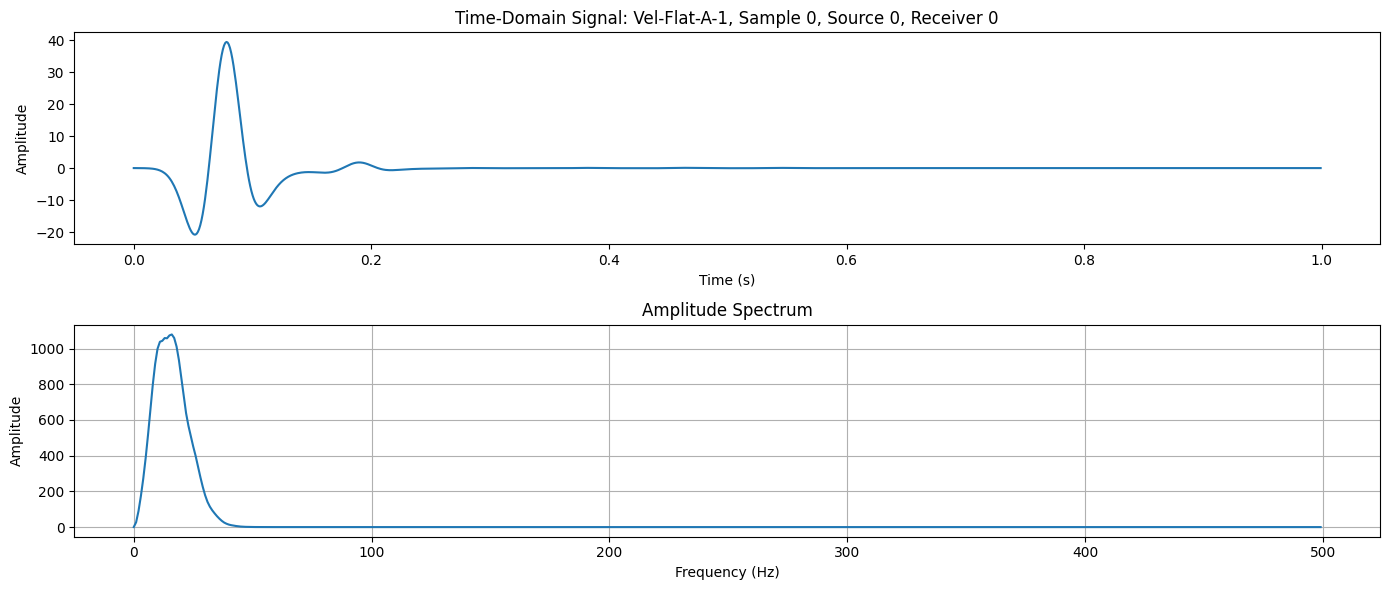

In [20]:
# Signal - Vel-Flat-A-1
signal = s1[sample,0,:,0]
sampling_rate = 1000  
T = 1.0 / sampling_rate
t = np.linspace(0.0, 1.0, sampling_rate, endpoint=False)  

# Compute the DFT of the signal
X = fft(signal)
N = len(signal) 
frequencies = fftfreq(N, T)[:N//2]

# Compute the magnitude and phase
magnitude = np.abs(X)[:N//2]  
phase = np.angle(X)[:N//2]

# Plot the signal
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Time-Domain Signal: Vel-Flat-A-1, Sample 0, Source 0, Receiver 0")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Plot the magnitude spectrum
plt.subplot(2, 1, 2)
plt.plot(frequencies, magnitude)
plt.title("Amplitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

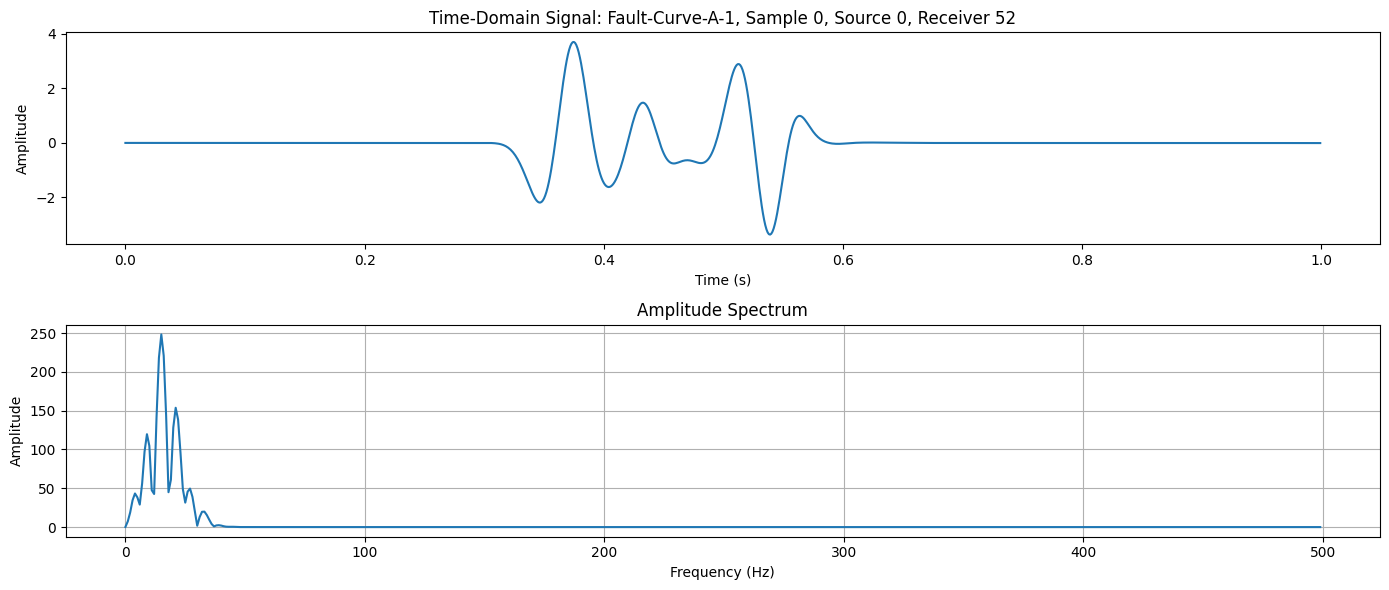

In [21]:
# Signal - Fault-Curve-A-1
signal = s17[sample,0,:,52]
sampling_rate = 1000  
T = 1.0 / sampling_rate
t = np.linspace(0.0, 1.0, sampling_rate, endpoint=False)  

# Compute the DFT of the signal
X = fft(signal)
N = len(signal) 
frequencies = fftfreq(N, T)[:N//2]

# Compute the magnitude and phase
magnitude = np.abs(X)[:N//2]  
phase = np.angle(X)[:N//2]

# Plot the signal
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Time-Domain Signal: Fault-Curve-A-1, Sample 0, Source 0, Receiver 52")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Plot the magnitude spectrum
plt.subplot(2, 1, 2)
plt.plot(frequencies, magnitude)
plt.title("Amplitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

## 2. Velocity Maps

### Load the data

#### Vel

In [22]:
# FlatVel_A
v1 = np.load(train_path + 'FlatVel_A/model/model1.npy')
v2 = np.load(train_path + 'FlatVel_A/model/model2.npy')

# FlatVel_B
v3 = np.load(train_path + 'FlatVel_B/model/model1.npy')
v4 = np.load(train_path + 'FlatVel_B/model/model2.npy')

# CurveVel_A
v5 = np.load(train_path + 'CurveVel_A/model/model1.npy')
v6 = np.load(train_path + 'CurveVel_A/model/model2.npy')

# CurveVel_B
v7 = np.load(train_path + 'CurveVel_B/model/model1.npy')
v8 = np.load(train_path + 'CurveVel_B/model/model2.npy')

#### Style

In [23]:
# Style_A
v9 = np.load(train_path + 'Style_A/model/model1.npy')
v10 = np.load(train_path + 'Style_A/model/model2.npy')

# Style_B
v11 = np.load(train_path + 'Style_B/model/model1.npy')
v12 = np.load(train_path + 'Style_B/model/model2.npy')

#### Fault

In [24]:
# FlatFault_A
v13 = np.load(train_path + 'FlatFault_A/vel2_1_0.npy')
v14 = np.load(train_path + 'FlatFault_A/vel4_1_0.npy')

# FlatFault_B
v15 = np.load(train_path + 'FlatFault_B/vel6_1_0.npy')
v16 = np.load(train_path + 'FlatFault_B/vel8_1_0.npy')

# CurveFault_A
v17 = np.load(train_path + 'CurveFault_A/vel2_1_0.npy')
v18 = np.load(train_path + 'CurveFault_A/vel4_1_0.npy')

# CurveFault_B
v19 = np.load(train_path + 'CurveFault_B/vel6_1_0.npy')
v20 = np.load(train_path + 'CurveFault_B/vel8_1_0.npy')

### Shape of each velocity map

In [25]:
print('Velocity Maps Shapes')

# Vel
print('Vel')
vel_velocity = [v1, v2, v3, v4, v5, v6, v7, v8]
for v in vel_velocity:
    print(v.shape)
print()

# Style
print('Style')
style_velocity = [v9, v10, v11, v12]
for s in style_velocity:
    print(s.shape)
print()

# Fault
print('Fault')
fault_velocity = [v13, v14, v15, v16, v17, v18, v19, v20]
for f in fault_velocity:
    print(f.shape)

Velocity Maps Shapes
Vel
(500, 1, 70, 70)
(500, 1, 70, 70)
(500, 1, 70, 70)
(500, 1, 70, 70)
(500, 1, 70, 70)
(500, 1, 70, 70)
(500, 1, 70, 70)
(500, 1, 70, 70)

Style
(500, 1, 70, 70)
(500, 1, 70, 70)
(500, 1, 70, 70)
(500, 1, 70, 70)

Fault
(500, 1, 70, 70)
(500, 1, 70, 70)
(500, 1, 70, 70)
(500, 1, 70, 70)
(500, 1, 70, 70)
(500, 1, 70, 70)
(500, 1, 70, 70)
(500, 1, 70, 70)


* Represents the subsurface velocity distribution
* 3D arrays of shape (batch_size, height, width)

### Check for missing data

In [26]:
velocity_maps = vel_velocity + style_velocity + fault_velocity
c = 0
for i, dataset in enumerate(velocity_maps):
    if np.isnan(dataset).sum() != 0:
        print(f'{np.isnan(dataset).sum()} missing values in dataset s{i+1}.')
        c += 1
if c == 0:
    print('No missing data')

No missing data


### Visualize the data

In [27]:
# Select sample indices
samples = np.round(np.linspace(0, 499, 4)).astype(int)
print(samples)

[  0 166 333 499]


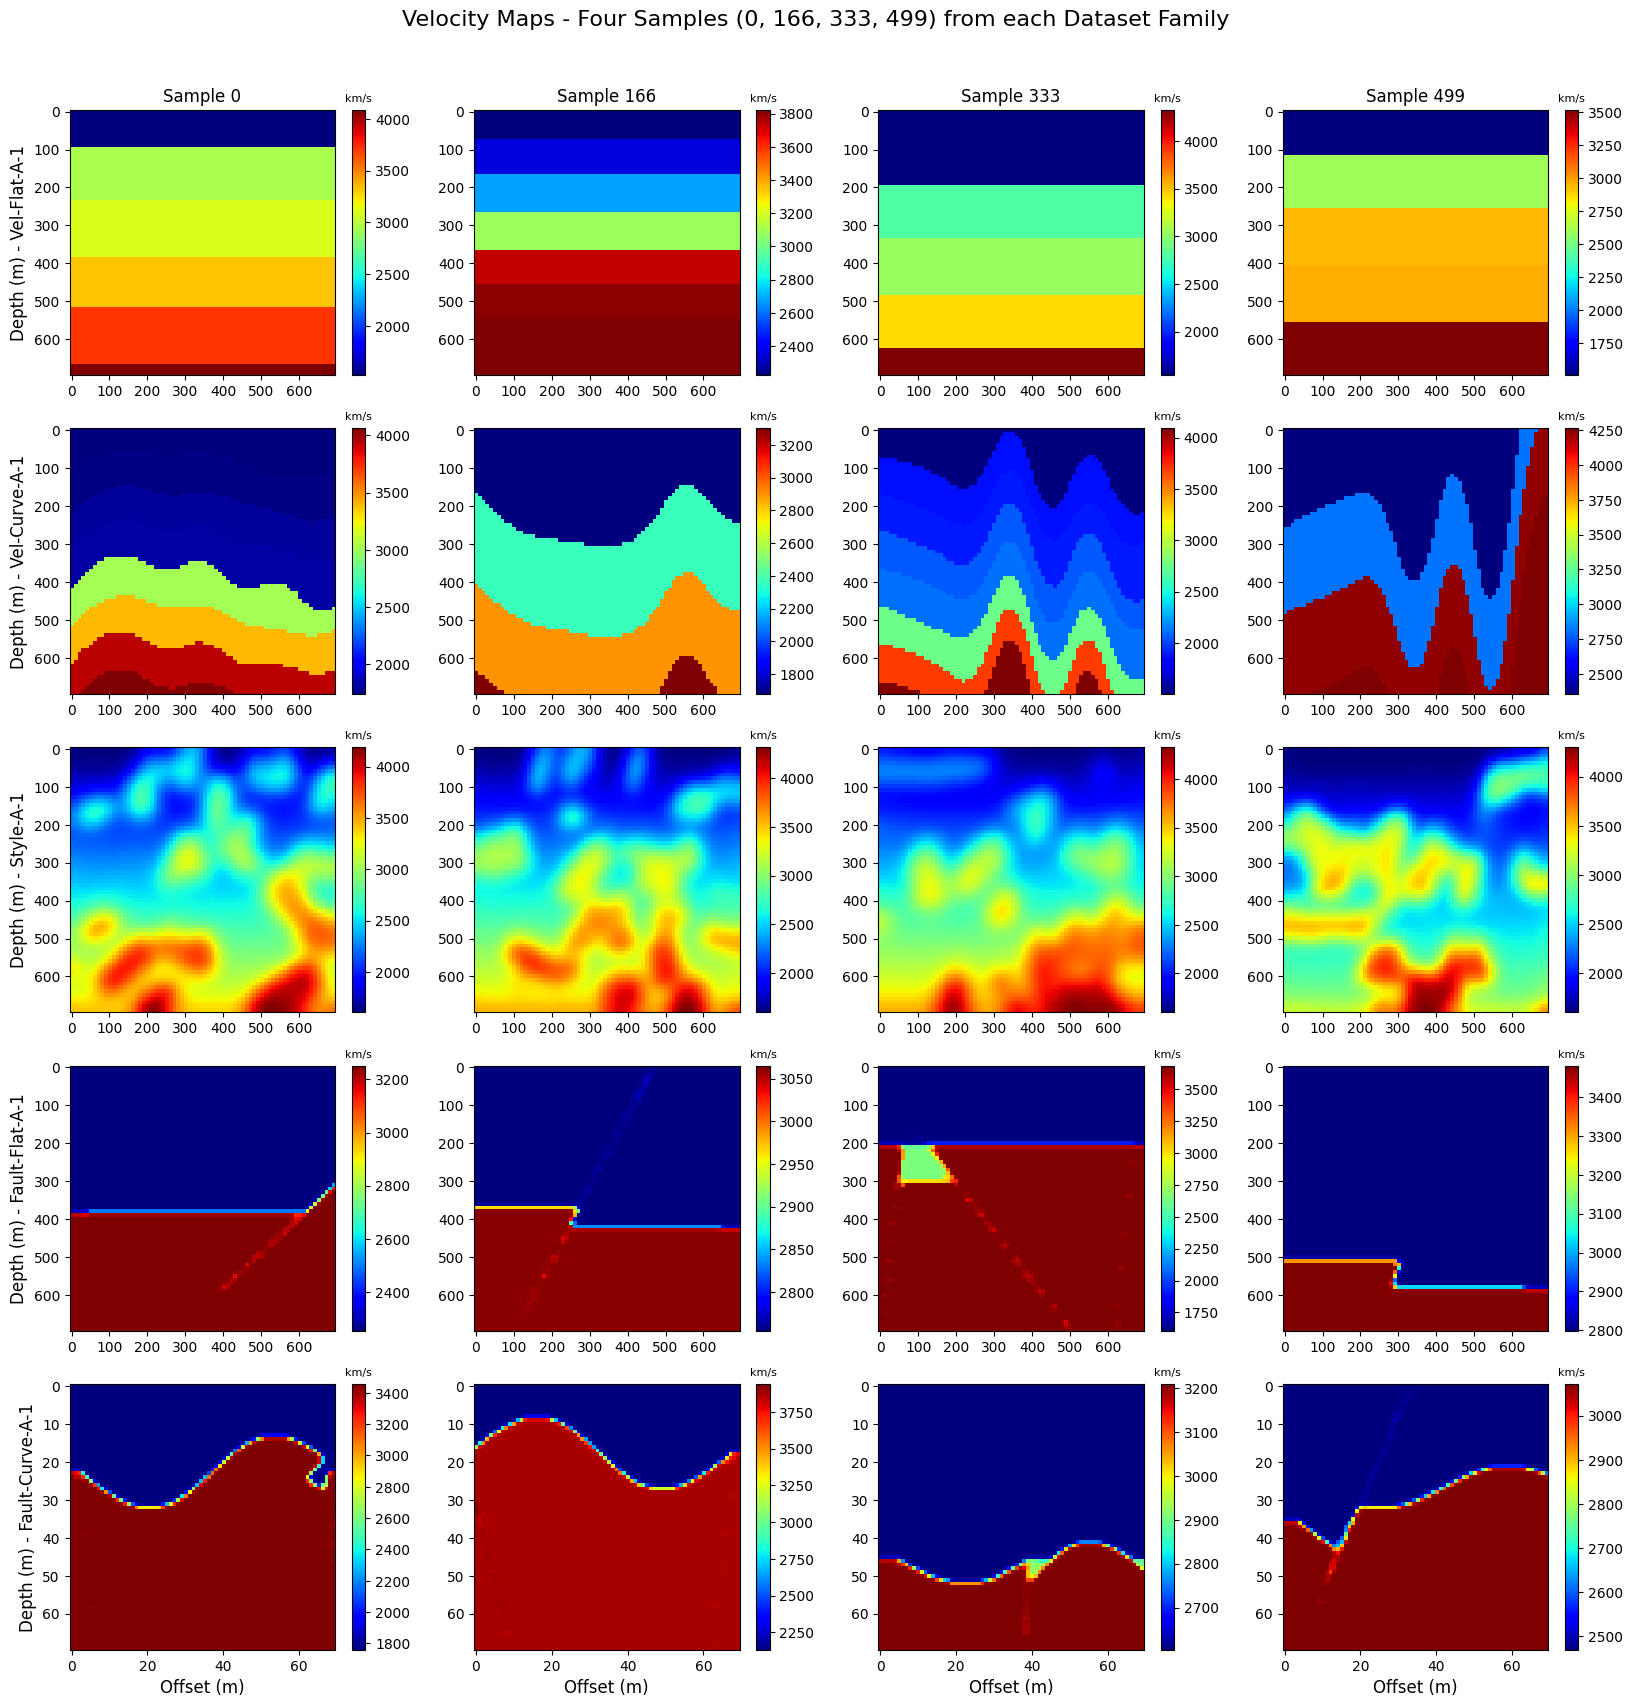

In [28]:
fig, ax = plt.subplots(5, 4, figsize = (20, 20))

colormap = 'jet'

# Loop over samples
for i in range(4):
    # Vel: Flat
    img = ax[0, i].imshow(v1[samples[i],0,:,:], cmap=colormap)
    clb = plt.colorbar(img, ax=ax[0, i])
    clb.ax.set_title('km/s', fontsize=8)

    # Vel: Curve
    img = ax[1, i].imshow(v5[samples[i],0,:,:], cmap=colormap)
    clb = plt.colorbar(img, ax=ax[1, i])
    clb.ax.set_title('km/s', fontsize=8)

    # Style
    img = ax[2, i].imshow(v9[samples[i],0,:,:], cmap=colormap)
    clb = plt.colorbar(img, ax=ax[2, i])
    clb.ax.set_title('km/s', fontsize=8)

    # Fault: Flat
    img = ax[3, i].imshow(v13[samples[i],0,:,:], cmap=colormap)
    clb = plt.colorbar(img, ax=ax[3, i])
    clb.ax.set_title('km/s', fontsize=8)

    # Fault: Curve
    img = ax[4, i].imshow(v17[samples[i],0,:,:], cmap=colormap)
    clb = plt.colorbar(img, ax=ax[4, i])
    clb.ax.set_title('km/s', fontsize=8)
    
    ax[4, i].set_xlabel('Offset (m)', fontsize=12)
    ax[0, i].set_title('Sample ' + str(samples[i]))

    for j in range(4):
        ax[i, j].set_xticks(range(0, 70, 10))
        ax[i, j].set_xticklabels(range(0, 700, 100))
        ax[i, j].set_yticks(range(0, 70, 10))
        ax[i, j].set_yticklabels(range(0, 700, 100))

fig.suptitle('Velocity Maps - Four Samples (0, 166, 333, 499) from each Dataset Family', 
             fontsize=16,
             y=0.93)

ax[0, 0].set_ylabel('Depth (m) - Vel-Flat-A-1', fontsize=12)
ax[1, 0].set_ylabel('Depth (m) - Vel-Curve-A-1', fontsize=12)
ax[2, 0].set_ylabel('Depth (m) - Style-A-1', fontsize=12)
ax[3, 0].set_ylabel('Depth (m) - Fault-Flat-A-1', fontsize=12)
ax[4, 0].set_ylabel('Depth (m) - Fault-Curve-A-1', fontsize=12)

plt.show()

### Summary statistics

In [29]:
# Calculate summary statistics for the velocity maps (20 total)
velocity_maps = style_velocity + vel_velocity + fault_velocity
idx = []
means_list_velocity = []
medians_list_velocity = []
max_list_velocity = []
min_list_velocity = []
std_list_velocity = []

for i, data in enumerate(velocity_maps):
    idx.append(i)
    means_list_velocity.append(np.mean(data))
    medians_list_velocity.append(np.median(data))
    max_list_velocity.append(np.max(data))
    min_list_velocity.append(np.min(data))
    std_list_velocity.append(np.std(data))

In [30]:
dataset_names = ['FlatVel_A1', 'FlatVel_A2', 'FlatVel_B1', 'FlatVel_B2', 'CurveVel_A1', 'CurveVel_A2', 'CurveVel_B1', 'CurveVel_B2', 
                 'Style_A1', 'Style_A2', 'Style_B1', 'Style_B2', 'FlatFault_A1', 'FlatFault_A2', 'FlatFault_B1', 'FlatFault_B2', 
                 'CurveFault_A1', 'CurveFault_A2', 'CurveFault_B1', 'CurveFault_B2']

d = {
    'dataset-name': dataset_names,
    'mean': means_list_velocity, 
    'standard-deviation': std_list_velocity,
    'median': medians_list_velocity,
    'maximum': max_list_velocity,
    'minimum': min_list_velocity
}

df_velocity = pd.DataFrame(data=d, index=idx)
df_velocity['range'] = df_velocity['maximum'] - df_velocity['minimum']
df_velocity['dataset-family'] = df_velocity['dataset-name'].apply(lambda x: 'Vel' if 'Vel' in x else 'Fault' if 'Fault' in x else 'Style')
df_velocity

,dataset-name,mean,standard-deviation,median,maximum,minimum,range,dataset-family
0,FlatVel_A1,2714.629150,655.045776,2742.820801,4419.978516,1535.398804,2884.579590,Vel
1,FlatVel_A2,2718.892090,648.087036,2747.059082,4415.643555,1535.176147,2880.467285,Vel
2,FlatVel_B1,2811.761963,622.559204,2846.004395,4383.250488,1554.177124,2829.073242,Vel
3,FlatVel_B2,2810.420410,617.723877,2844.897949,4400.809082,1549.650757,2851.158203,Vel
4,CurveVel_A1,2760.590820,784.479858,2694.000000,4500.000000,1501.000000,2999.000000,Vel
5,CurveVel_A2,2798.362061,782.393433,2744.000000,4500.000000,1502.000000,2998.000000,Vel
6,CurveVel_B1,2998.472656,847.464722,2986.000000,4499.000000,1501.000000,2998.000000,Vel
7,CurveVel_B2,2988.187988,868.463989,2961.000000,4498.000000,1500.000000,2998.000000,Vel
8,Style_A1,2806.970215,792.702393,2783.000000,4500.000000,1501.000000,2999.000000,Style
9,Style_A2,2785.919189,797.806396,2760.000000,4500.000000,1502.000000,2998.000000,Style


In [31]:
df_velocity.describe()

,mean,standard-deviation,median,maximum,minimum,range
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2916.821777,803.810791,2914.639160,4480.483887,1510.220093,2970.263916
std,120.919960,92.193558,126.755867,39.330791,17.891146,56.939983
min,2714.629150,617.723877,2694.000000,4383.250488,1500.000000,2829.073242
25%,2804.818176,783.958252,2777.250000,4497.750000,1500.000000,2993.750000
50%,2998.848755,849.413696,2991.000000,4499.500000,1501.500000,2998.000000
75%,3013.986755,868.568100,3009.000000,4500.000000,1505.500000,2999.000000
max,3031.869629,888.175354,3054.000000,4500.000000,1554.177124,3000.000000


#### Grouped by dataset family

In [32]:
# Velocity maps
numeric_list = df_velocity.select_dtypes(include='number').columns.tolist()
df_velocity.groupby('dataset-family')[numeric_list].mean().round()

,mean,standard-deviation,median,maximum,minimum,range
dataset-family,,,,,,
Fault,3017.0,866.0,3020.0,4499.0,1503.0,2996.0
Style,2900.0,831.0,2892.0,4500.0,1501.0,2999.0
Vel,2825.0,728.0,2821.0,4452.0,1522.0,2930.0


In [33]:
# Seismic data
df_seismic_grouped

,mean,standard-deviation,median,maximum,minimum,zero-crossings-count,range,signal-to-noise-ratio
dataset-family,,,,,,,,
Fault,-0.0,1.52,-0.0,49.570000,-25.070000,16437706.75,74.639999,-0.0
Style,0.0,1.46,-0.0,46.330002,-23.799999,17896829.00,70.129997,0.0
Vel,-0.0,1.63,-0.0,53.349998,-26.629999,13766668.25,79.980003,-0.0


### Histograms for velocity maps

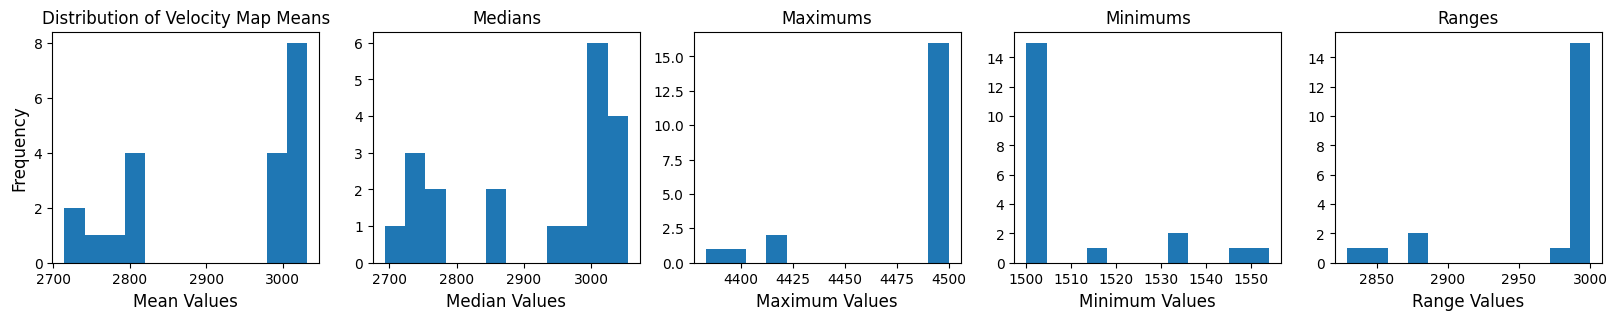

In [34]:
fig, ax = plt.subplots(1, 5, figsize = (20, 3))

ax[0].hist(means_list_velocity, bins=12)
ax[1].hist(medians_list_velocity, bins=12)
ax[2].hist(max_list_velocity, bins=12)
ax[3].hist(min_list_velocity, bins=12)
ax[4].hist(df_velocity['range'].tolist(), bins=12)

ax[0].set_title('Distribution of Velocity Map Means')
ax[1].set_title('Medians')
ax[2].set_title('Maximums')
ax[3].set_title('Minimums')
ax[4].set_title('Ranges')

ax[0].set_xlabel('Mean Values', fontsize=12)
ax[1].set_xlabel('Median Values', fontsize=12)
ax[2].set_xlabel('Maximum Values', fontsize=12)
ax[3].set_xlabel('Minimum Values', fontsize=12)
ax[4].set_xlabel('Range Values', fontsize=12)

ax[0].set_ylabel('Frequency', fontsize=12)

plt.show()

### Boxplots of velocity maps

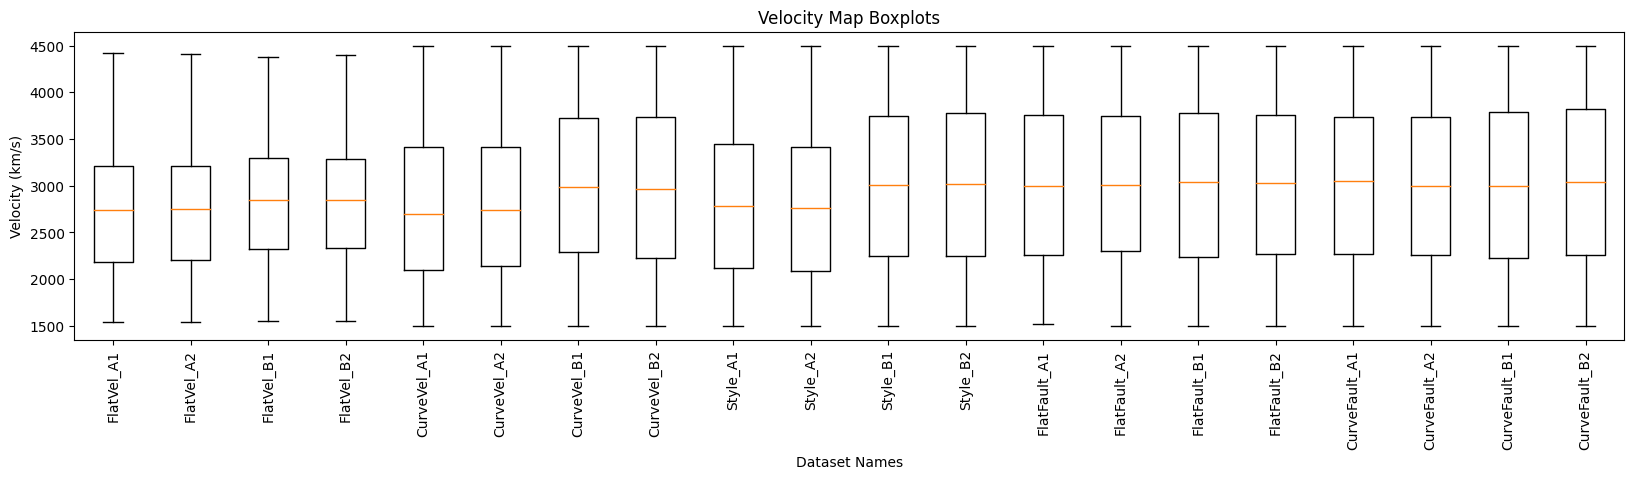

In [35]:
plt.figure(figsize=(20,4))

plt.boxplot([v.flatten() for v in velocity_maps])

plt.title('Velocity Map Boxplots')
plt.ylabel('Velocity (km/s)')
plt.xlabel('Dataset Names')
plt.xticks(ticks=[x for x in range(1, len(dataset_names) + 1)], labels=dataset_names, rotation=90)

plt.show()

### Cumulative Distribution Function (CDF) of velocity maps

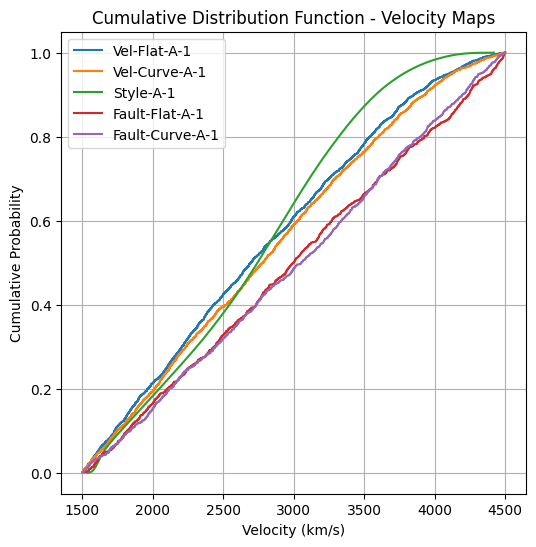

In [36]:
# Compute CDF of a velocity map from each dataset family
fig, ax = plt.subplots(1, 1, figsize = (6,6)) 

# Vel-Flat-A-1
ecdf_result = stats.ecdf(v1.flatten())
plt.plot(ecdf_result.cdf.quantiles, ecdf_result.cdf.probabilities, drawstyle='steps-post', label='Vel-Flat-A-1')

# Vel-Curve-A-1
ecdf_result = stats.ecdf(v5.flatten())
plt.plot(ecdf_result.cdf.quantiles, ecdf_result.cdf.probabilities, drawstyle='steps-post', label='Vel-Curve-A-1')

# Style-A-1
ecdf_result = stats.ecdf(v9.flatten())
plt.plot(ecdf_result.cdf.quantiles, ecdf_result.cdf.probabilities, drawstyle='steps-post', label='Style-A-1')

# Fault-Flat-A-1
ecdf_result = stats.ecdf(v13.flatten())
plt.plot(ecdf_result.cdf.quantiles, ecdf_result.cdf.probabilities, drawstyle='steps-post', label='Fault-Flat-A-1')

# Fault-Curve-A-1
ecdf_result = stats.ecdf(v17.flatten())
plt.plot(ecdf_result.cdf.quantiles, ecdf_result.cdf.probabilities, drawstyle='steps-post', label='Fault-Curve-A-1')

plt.title('Cumulative Distribution Function - Velocity Maps')
plt.xlabel("Velocity (km/s)")
plt.ylabel("Cumulative Probability")
plt.grid(True)
plt.legend()

plt.show()

## 3. Seismic Data & Velocity Map Pairs

### Side-by-side visualizations

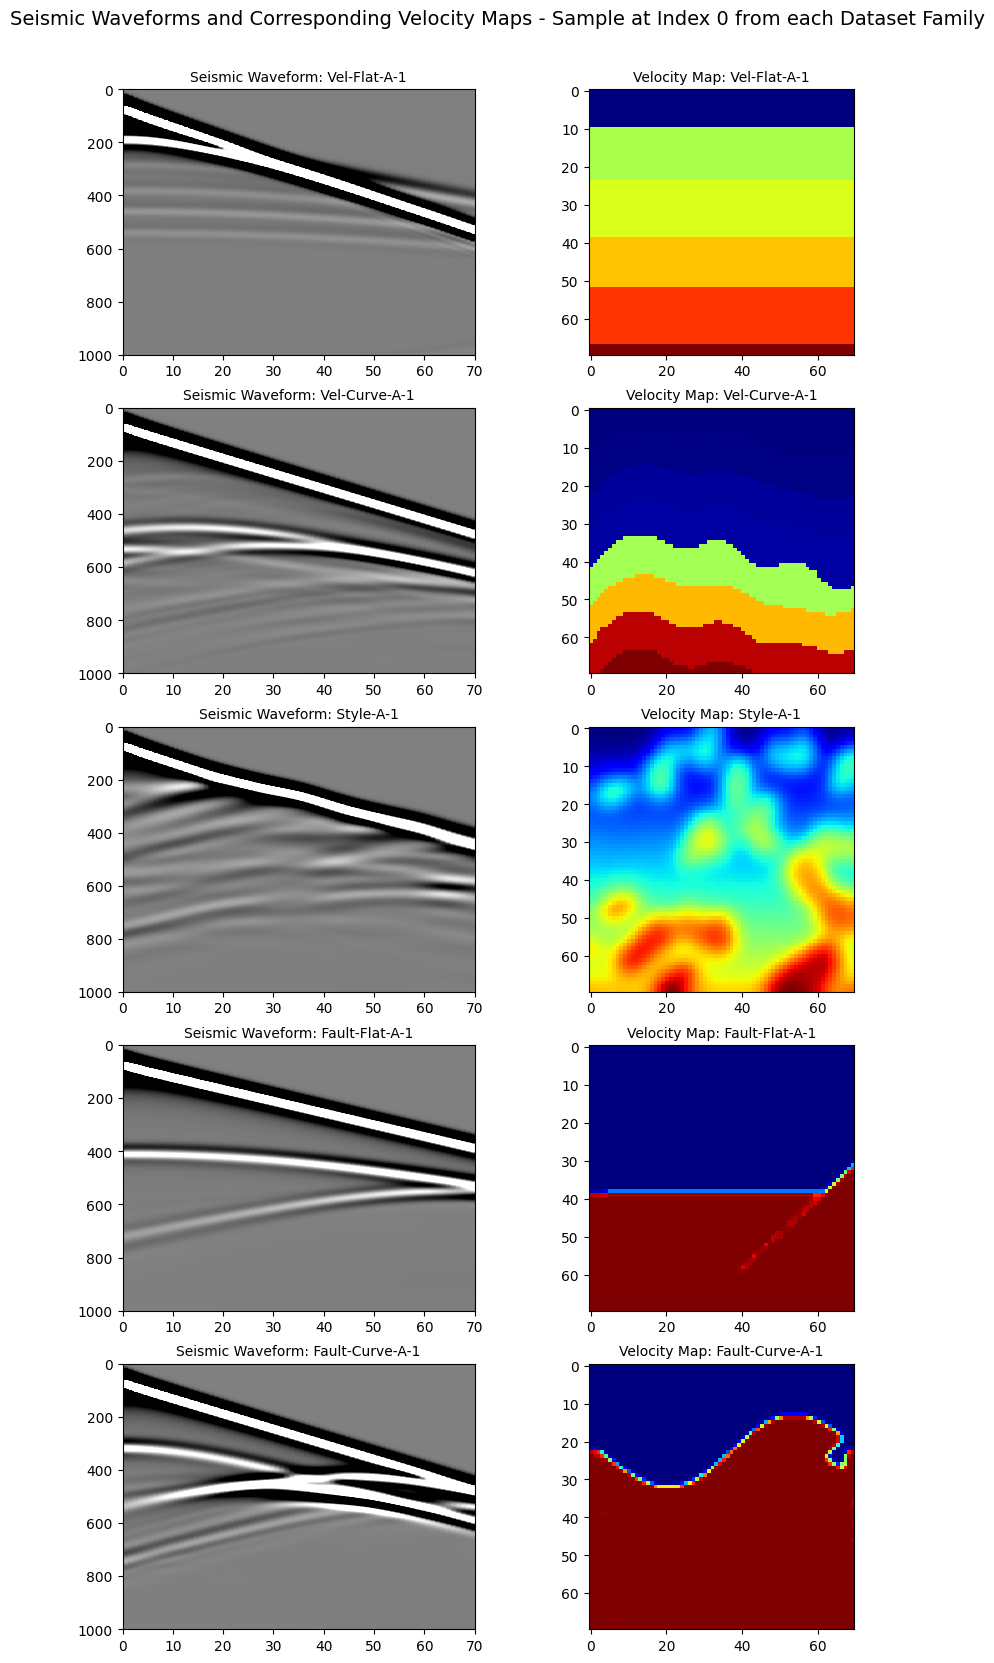

In [37]:
fig, ax = plt.subplots(5, 2, figsize = (10,20))

colormap_seismic = 'gray'
colormap_velocity = 'jet'
sample = 0

ax[0, 0].imshow(s1[sample,0,:,:], extent=[0,70,1000,0], aspect='auto', cmap=colormap_seismic, vmin=-0.5, vmax=0.5)
ax[0, 1].imshow(v1[sample,0,:,:], cmap=colormap_velocity)
ax[0, 0].set_title('Seismic Waveform: Vel-Flat-A-1', fontsize=10)
ax[0, 1].set_title('Velocity Map: Vel-Flat-A-1', fontsize=10)

ax[1, 0].imshow(s5[sample,0,:,:], extent=[0,70,1000,0], aspect='auto', cmap=colormap_seismic, vmin=-0.5, vmax=0.5)
ax[1, 1].imshow(v5[sample,0,:,:], cmap=colormap_velocity)
ax[1, 0].set_title('Seismic Waveform: Vel-Curve-A-1', fontsize=10)
ax[1, 1].set_title('Velocity Map: Vel-Curve-A-1', fontsize=10)

ax[2, 0].imshow(s9[sample,0,:,:], extent=[0,70,1000,0], aspect='auto', cmap=colormap_seismic, vmin=-0.5, vmax=0.5)
ax[2, 1].imshow(v9[sample,0,:,:], cmap=colormap_velocity)
ax[2, 0].set_title('Seismic Waveform: Style-A-1', fontsize=10)
ax[2, 1].set_title('Velocity Map: Style-A-1', fontsize=10)

ax[3, 0].imshow(s13[sample,0,:,:], extent=[0,70,1000,0], aspect='auto', cmap=colormap_seismic, vmin=-0.5, vmax=0.5)
ax[3, 1].imshow(v13[sample,0,:,:], cmap=colormap_velocity)
ax[3, 0].set_title('Seismic Waveform: Fault-Flat-A-1', fontsize=10)
ax[3, 1].set_title('Velocity Map: Fault-Flat-A-1', fontsize=10)

ax[4, 0].imshow(s17[sample,0,:,:], extent=[0,70,1000,0], aspect='auto', cmap=colormap_seismic, vmin=-0.5, vmax=0.5)
ax[4, 1].imshow(v17[sample,0,:,:], cmap=colormap_velocity)
ax[4, 0].set_title('Seismic Waveform: Fault-Curve-A-1', fontsize=10)
ax[4, 1].set_title('Velocity Map: Fault-Curve-A-1', fontsize=10)

fig.suptitle('Seismic Waveforms and Corresponding Velocity Maps - Sample at Index 0 from each Dataset Family', 
             fontsize=14,
             y=.92)

plt.show()

### Scatter plots & correlations

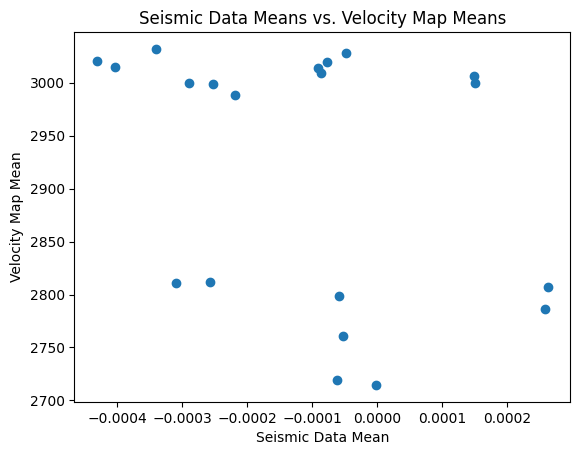

In [38]:
# Scatter plot: means
plt.scatter(means_list, means_list_velocity)

plt.xlabel("Seismic Data Mean")
plt.ylabel("Velocity Map Mean")
plt.title("Seismic Data Means vs. Velocity Map Means")

plt.show()

In [39]:
stats.pearsonr(means_list, means_list_velocity)

PearsonRResult(statistic=-0.3452588, pvalue=0.13598364732670085)

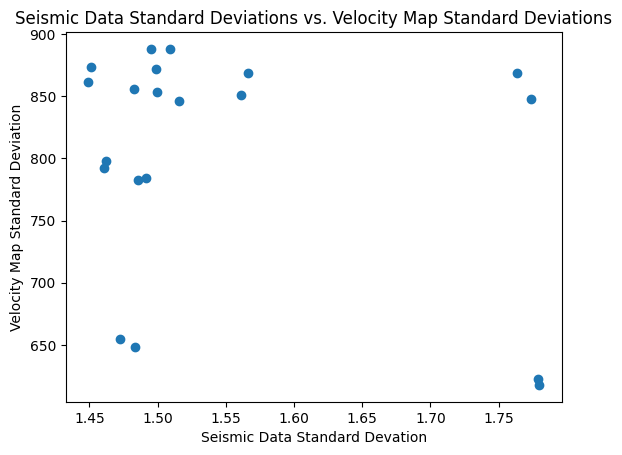

In [40]:
# Scatter plot: standard deviations
plt.scatter(std_list, std_list_velocity)

plt.xlabel("Seismic Data Standard Devation")
plt.ylabel("Velocity Map Standard Deviation")
plt.title("Seismic Data Standard Deviations vs. Velocity Map Standard Deviations")

plt.show()

In [41]:
stats.pearsonr(std_list, std_list_velocity)

PearsonRResult(statistic=-0.31080738, pvalue=0.18227219468596229)

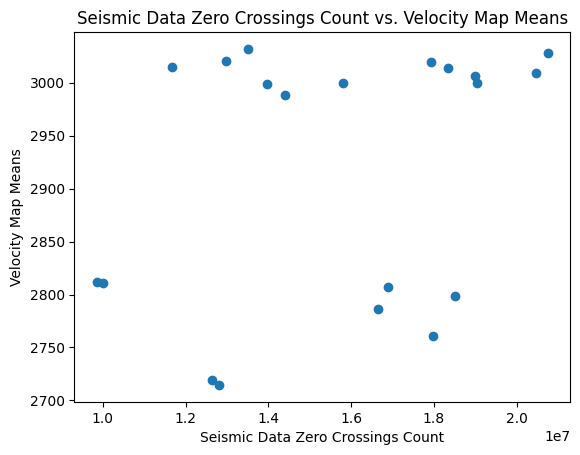

In [42]:
# Scatter plot: zero crossings count vs. velocity map means
plt.scatter(zero_crossings_list, means_list_velocity)

plt.xlabel("Seismic Data Zero Crossings Count")
plt.ylabel("Velocity Map Means")
plt.title("Seismic Data Zero Crossings Count vs. Velocity Map Means")

plt.show()

In [43]:
stats.pearsonr(zero_crossings_list, means_list_velocity)

PearsonRResult(statistic=0.3067990004016312, pvalue=0.18827462429404845)

#### Correlation heatmap

In [44]:
df_total = pd.merge(df_seismic, df_velocity, on=['dataset-name', 'dataset-family'], suffixes=('_s', '_v'))
df_num = df_total.select_dtypes(include='number')
df_num.corr(method='pearson').iloc[:8, 8:]

,mean_v,standard-deviation_v,median_v,maximum_v,minimum_v,range_v
mean_s,-0.345259,0.023304,-0.370297,0.163171,-0.248372,0.190750
standard-deviation_s,0.028245,-0.310807,0.068488,-0.430660,0.461385,-0.442447
median_s,-0.065756,0.070276,-0.076889,0.074734,-0.162141,0.102568
maximum_s,-0.221205,-0.366906,-0.213902,-0.394316,0.380353,-0.391882
minimum_s,0.331344,0.459493,0.322689,0.457931,-0.447648,0.456967
zero-crossings-count,0.306799,0.645573,0.210374,0.675948,-0.751311,0.702976
range_s,-0.251972,-0.393472,-0.244273,-0.413121,0.400104,-0.411077
signal-to-noise-ratio,-0.358559,-0.004095,-0.380094,0.133289,-0.217285,0.160341


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


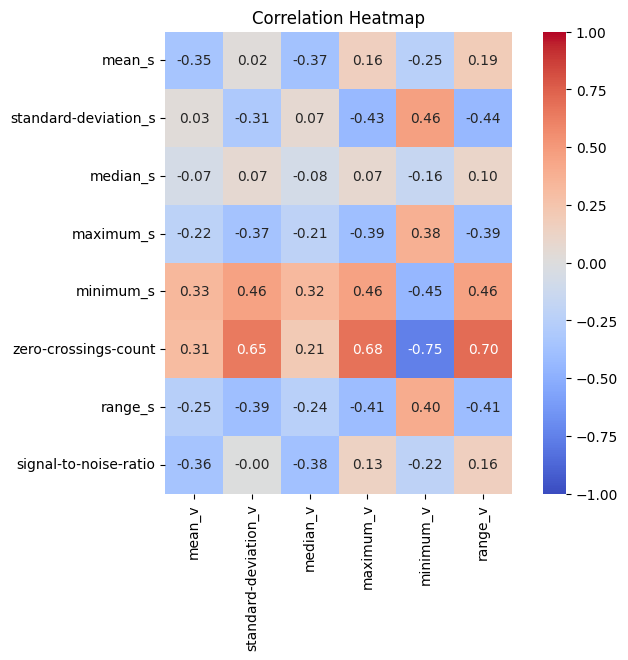

In [45]:
df_num.fillna(0, inplace=True)
df_num.replace([np.inf, -np.inf], 0, inplace=True)
corr_matrix = df_num.corr(method='pearson').iloc[:8, 8:]
corr_matrix.fillna(0, inplace=True)
corr_matrix.replace([np.inf, -np.inf], 0, inplace=True)

plt.figure(figsize=(8,6))

sns.heatmap(corr_matrix, 
            annot=True,           
            cmap='coolwarm',      
            vmin=-1, 
            vmax=1,
            center=0,     
            square=True,         
            fmt='.2f')          

plt.title('Correlation Heatmap')

plt.show()

#### Scatterplot matrix

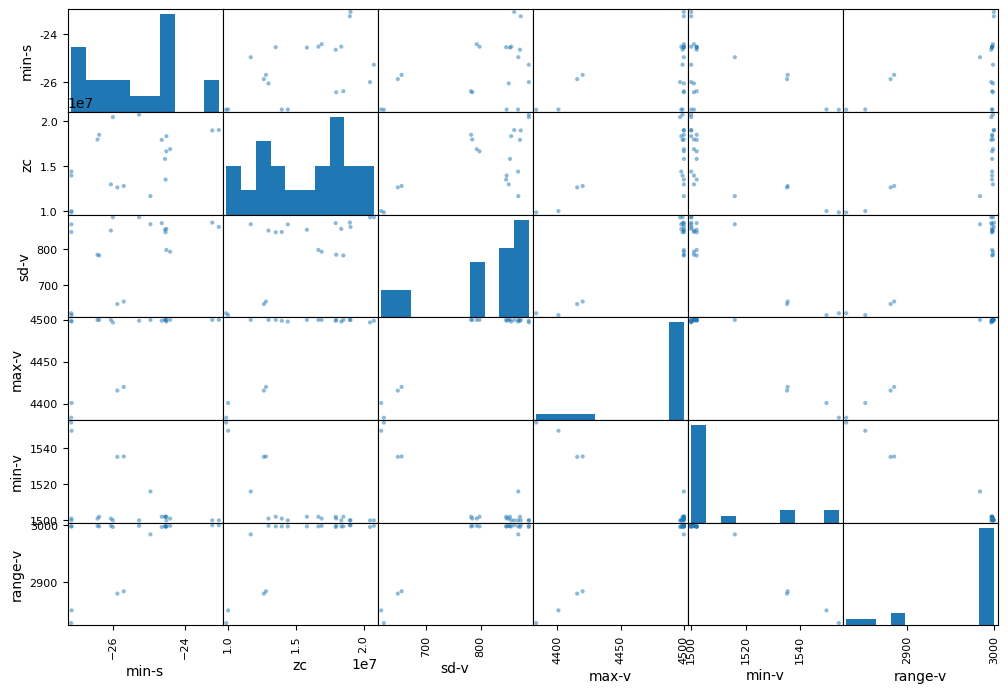

In [46]:
df_num_subset = df_num[['minimum_s', 'zero-crossings-count', 'standard-deviation_v', 'maximum_v', 'minimum_v', 'range_v']]
df_num_subset.columns = ['min-s', 'zc', 'sd-v', 'max-v', 'min-v', 'range-v']
pd.plotting.scatter_matrix(df_num_subset, figsize=(12,8))
plt.show()

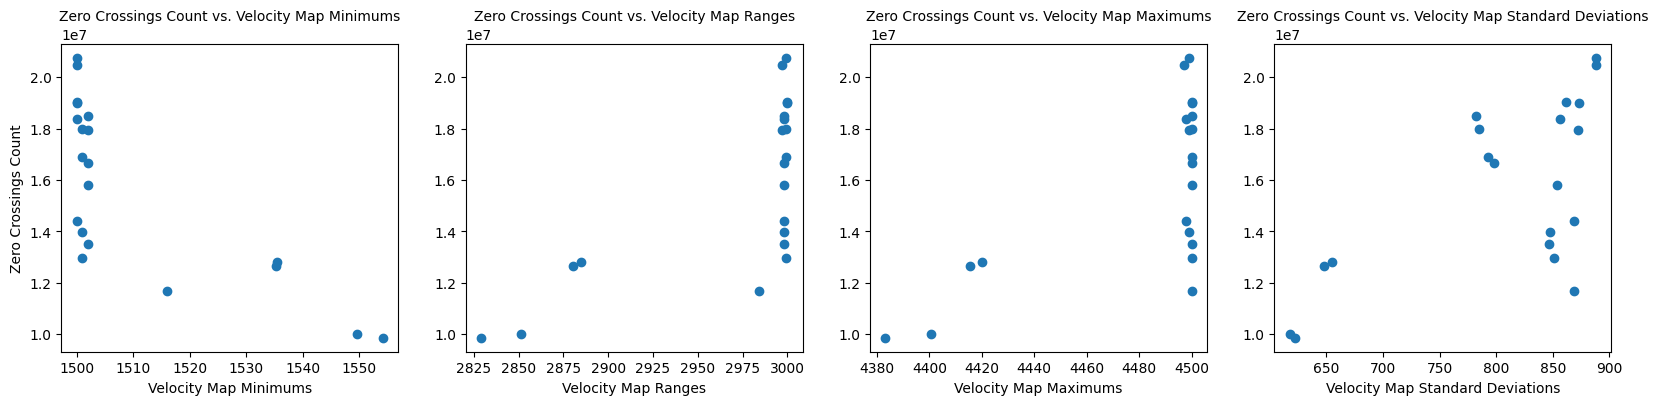

In [47]:
# Scatter plot: zero crossings count vs. velocity map summary statistics
fig, ax = plt.subplots(1, 4, figsize = (20, 4))

ax[0].scatter(min_list_velocity, zero_crossings_list)
ax[0].set_xlabel("Velocity Map Minimums")
ax[0].set_ylabel("Zero Crossings Count")
ax[0].set_title("Zero Crossings Count vs. Velocity Map Minimums", fontsize=10)

ax[1].scatter(df_velocity['range'].tolist(), zero_crossings_list)
ax[1].set_xlabel("Velocity Map Ranges")
ax[1].set_title("Zero Crossings Count vs. Velocity Map Ranges", fontsize=10)

ax[2].scatter(max_list_velocity, zero_crossings_list)
ax[2].set_xlabel("Velocity Map Maximums")
ax[2].set_title("Zero Crossings Count vs. Velocity Map Maximums", fontsize=10)

ax[3].scatter(std_list_velocity, zero_crossings_list)
ax[3].set_xlabel("Velocity Map Standard Deviations")
ax[3].set_title("Zero Crossings Count vs. Velocity Map Standard Deviations", fontsize=10)

plt.show()

In [48]:
print(stats.pearsonr(zero_crossings_list, min_list_velocity))
print(stats.pearsonr(zero_crossings_list, df_velocity['range'].tolist()))
print(stats.pearsonr(zero_crossings_list, max_list_velocity))
print(stats.pearsonr(zero_crossings_list, std_list_velocity))

PearsonRResult(statistic=-0.7513108525716701, pvalue=0.00013431821447899093)
PearsonRResult(statistic=0.7029756797684886, pvalue=0.0005460507751172057)
PearsonRResult(statistic=0.6759482893413554, pvalue=0.0010695859069522267)
PearsonRResult(statistic=0.6455733843507172, pvalue=0.0021100204271744215)
